PROYECTO 1: Analisis Exploratorio de Datos-Ventas de una Tienda

In [1]:
# Celda 1: Importar librerias

# Pandas: Para manipular datos en tablas (DataFrames)
import pandas as pd

# NumPy: Para operaciones matematicas y generar numeros aleatorios
import numpy as np

# Matplotlib: Para crear graficas basicas
import matplotlib.pyplot as plt

# Seaborn: Para crear graficas mas bonitas y avanzadas
import seaborn as sns

# Configuracion para que las graficas se vean mejor
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Esta linea hace que las graficas aparezcan en el notebook
%matplotlib inline

print("Librerias importadas")

Librerias importadas


In [3]:
# Celda 2: Crear el DataSet

# Semilla para obtener siempre los mismos datos aleatorios
np.random.seed(42)

# Numero de ventas que vamos a generar
n_ventas = 500

# Creamos un diccionario con los datos de las ventas
datos = {
    'ID_Venta': range(1, n_ventas + 1),  # IDs del 1 al 500
    'Producto': np.random.choice(['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Audifonos'], n_ventas),
    'Categoria': np.random.choice(['Electrónica', 'Accesorios'], n_ventas),
    'Precio': np.random.uniform(10, 1500, n_ventas).round(2),  # Precios entre $10 y $1500
    'Cantidad': np.random.randint(1, 10, n_ventas),  # Cantidades entre 1 y 9
    'Fecha': pd.date_range(start='2024-01-01', periods=n_ventas, freq='D')  # Fechas consecutivas
}

# Convertimos el diccionario en un DataFrame
df = pd.DataFrame(datos)

# Calculamos el total de cada venta (Precio x Cantidad)
df['Total'] = df['Precio'] * df['Cantidad']

print("Dataset creado")
print(f"Total de ventas: {len(df)}")

Dataset creado
Total de ventas: 500


In [4]:
# Celda 3: Mostrar las primeras filas

# Mostrar las primeras 5 filas del dataset
print("Primeras 5 filas")
df.head()

Primeras 5 filas


,ID_Venta,Producto,Categoria,Precio,Cantidad,Fecha,Total
0,1,Monitor,Accesorios,884.39,9,2024-01-01,7959.51
1,2,Audifonos,Accesorios,1120.70,5,2024-01-02,5603.50
2,3,Teclado,Accesorios,653.17,4,2024-01-03,2612.68
3,4,Audifonos,Electrónica,200.09,6,2024-01-04,1200.54
4,5,Audifonos,Accesorios,432.83,7,2024-01-05,3029.81


In [5]:
# Celda 4: Ver las ultimas filas

# Mostrar las ultimas 5 filas
print("Ultimas 5 filas")
df.tail()

Ultimas 5 filas


,ID_Venta,Producto,Categoria,Precio,Cantidad,Fecha,Total
495,496,Laptop,Accesorios,991.09,8,2025-05-10,7928.72
496,497,Teclado,Electrónica,1277.37,1,2025-05-11,1277.37
497,498,Laptop,Accesorios,1302.27,6,2025-05-12,7813.62
498,499,Laptop,Electrónica,1065.46,9,2025-05-13,9589.14
499,500,Laptop,Accesorios,1257.15,7,2025-05-14,8800.05


In [6]:
# Celda 5: Mostrar Informacion

# Informacion de dataset: tipos de datos, valores no nulos
print("Informacion del dataset")
df.info()

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID_Venta   500 non-null    int64         
 1   Producto   500 non-null    object        
 2   Categoria  500 non-null    object        
 3   Precio     500 non-null    float64       
 4   Cantidad   500 non-null    int32         
 5   Fecha      500 non-null    datetime64[ns]
 6   Total      500 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 25.5+ KB


In [7]:
# Celda 6: Estadistica descriptiva

# Estadisticas: promedio, minimo, maximo, desviacion estandar, etc
print("Estadisticas descriptivas de las columnas numericas")
df.describe()

Estadisticas descriptivas de las columnas numericas


,ID_Venta,Precio,Cantidad,Fecha,Total
count,500.000000,500.000000,500.000000,500,500.00000
mean,250.500000,752.690640,4.942000,2024-09-06 12:00:00,3773.73884
min,1.000000,16.900000,1.000000,2024-01-01 00:00:00,36.63000
25%,125.750000,362.122500,3.000000,2024-05-04 18:00:00,1190.72250
50%,250.500000,751.080000,5.000000,2024-09-06 12:00:00,2731.19000
75%,375.250000,1130.525000,7.000000,2025-01-09 06:00:00,5902.91750
max,500.000000,1496.920000,9.000000,2025-05-14 00:00:00,13381.56000
std,144.481833,432.705896,2.602341,NaN,3238.75516


In [9]:
# Celda 7: Verificar valores nulos

print("Valores nulos por columna")
print(df.isnull().sum())

# Si hay algun valor nulo, mostramos resumen
if df.isnull().sum().sum() == 0:
    print("\n No hay valores nulos en el DataSet")
else:
    print("\n Hay valores nulos")

Valores nulos por columna
ID_Venta     0
Producto     0
Categoria    0
Precio       0
Cantidad     0
Fecha        0
Total        0
dtype: int64

 No hay valores nulos en el DataSet


In [10]:
# Celda 8: Dimensiones del DataSet

# Obtenemos el numero de filas y columnas
filas, columnas = df.shape
print(f"Dimensiones del dataset:")
print(f"Filas (registros): {filas}")
print(f"Columnas (variables): {columnas}")
print(f"\n Nombres de las columnas:")
print(df.columns.tolist())

Dimensiones del dataset:
Filas (registros): 500
Columnas (variables): 7

 Nombres de las columnas:
['ID_Venta', 'Producto', 'Categoria', 'Precio', 'Cantidad', 'Fecha', 'Total']


In [12]:
# Celda 9: Cantidad de venta por producto

# Contamos cuantas veces se vendio cada producto
ventas_por_producto = df['Producto'].value_counts()

print("Cantidad de ventas por producto:")
print(ventas_por_producto)
print(f"\n Producto mas vendido: {ventas_por_producto.index[0]} ({ventas_por_producto.iloc[0]}  ventas)")

Cantidad de ventas por producto:
Producto
Monitor      112
Laptop       109
Mouse         95
Audifonos     93
Teclado       91
Name: count, dtype: int64

 Producto mas vendido: Monitor (112  ventas)


In [13]:
# Celda 10: Ingresos totales por producto

# Sumamos el total de ingresos por cada producto
ingresos_por_producto = df.groupby('Producto')['Total'].sum().sort_values(ascending=False)

print("Ingresos totales pro productos")
for producto, ingreso in ingresos_por_producto.items():
    print(f" {producto}: ${ingreso:,.2f}")

print(f"\n Producto que genera mas ingresos: {ingresos_por_producto.index[0]} (${ingresos_por_producto.iloc[0]:,.2f})")

Ingresos totales pro productos
 Audifonos: $406,500.81
 Mouse: $386,577.61
 Monitor: $384,443.59
 Laptop: $363,888.35
 Teclado: $345,459.06

 Producto que genera mas ingresos: Audifonos ($406,500.81)


In [14]:
# Celda 11: Precio promedio por producto

# Calculamos el precio promedio de cada producto
precio_promedio = df.groupby('Producto')['Precio'].mean().sort_values(ascending=False)

print("Precio promedio por producto:")
for producto, precio in precio_promedio.items():
    print(f" {producto}: ${precio:.2f}")

Precio promedio por producto:
 Audifonos: $836.74
 Mouse: $762.03
 Teclado: $736.23
 Monitor: $721.69
 Laptop: $718.42


In [15]:
# Celda 12: Analisis por categoria

#Agrupamos por categoría y calculamos estadísticas
print("Análisis por categoría:")
print("\nVentas por categoría:")
print(df['Categoria'].value_counts())

print("\nIngresos por categoría:")
ingresos_categoria = df.groupby('Categoria')['Total'].sum()
for categoria, ingreso in ingresos_categoria.items():
    print(f"   {categoria}: ${ingreso:,.2f}")

Análisis por categoría:

Ventas por categoría:
Categoria
Electrónica    267
Accesorios     233
Name: count, dtype: int64

Ingresos por categoría:
   Accesorios: $857,086.10
   Electrónica: $1,029,783.32


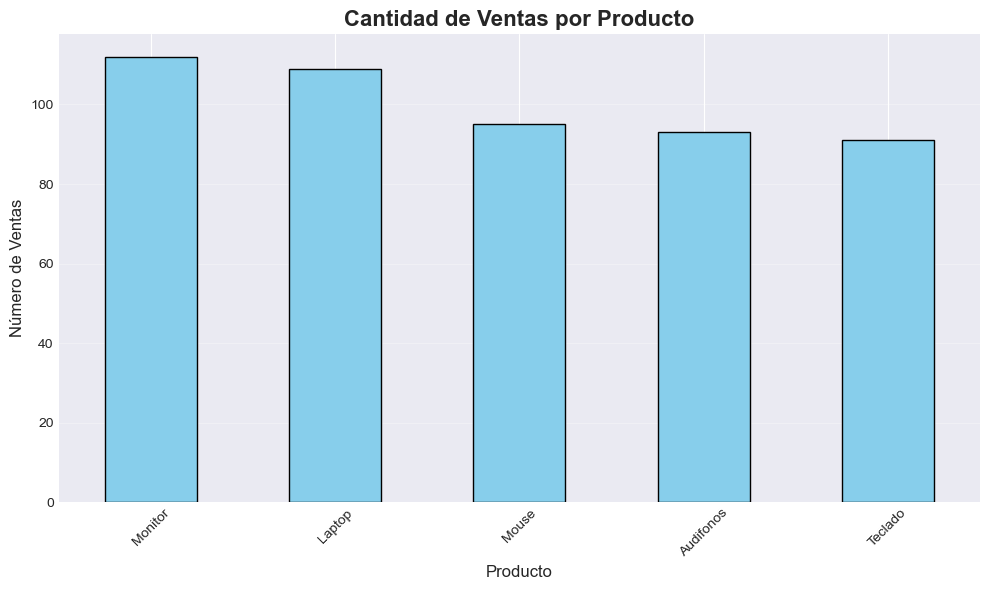

Gráfica de barras creada


In [16]:
# CELDA 13: GRÁFICA - VENTAS POR PRODUCTO

# Creamos una gráfica de barras
plt.figure(figsize=(10, 6))
ventas_por_producto.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Ventas por Producto', fontsize=16, fontweight='bold')
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfica de barras creada")

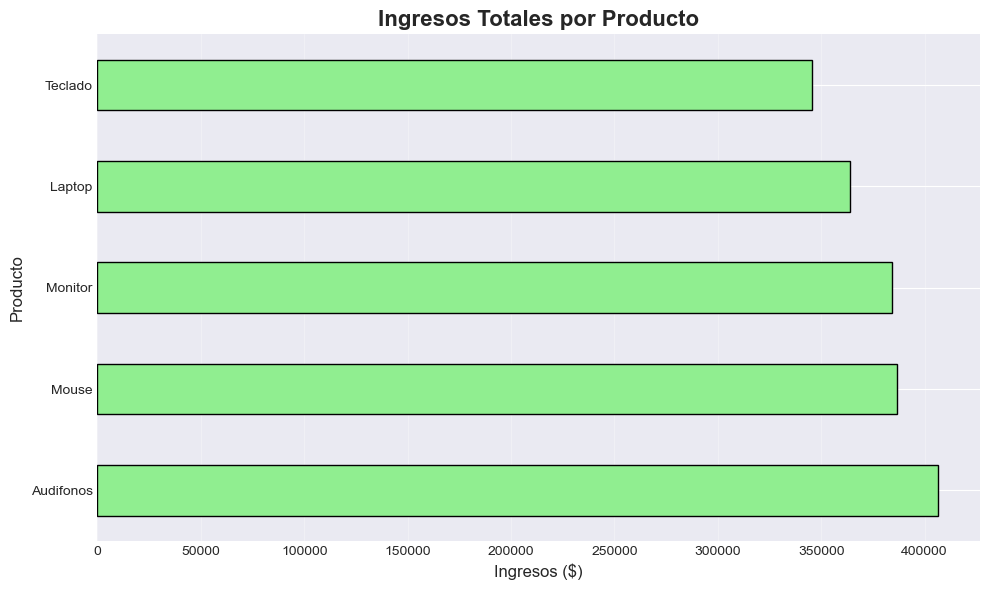

Gráfica de barras horizontales creada


In [17]:
# CELDA 14: GRÁFICA - INGRESOS POR PRODUCTO

# Creamos una gráfica de barras horizontales
plt.figure(figsize=(10, 6))
ingresos_por_producto.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Ingresos Totales por Producto', fontsize=16, fontweight='bold')
plt.xlabel('Ingresos ($)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfica de barras horizontales creada")

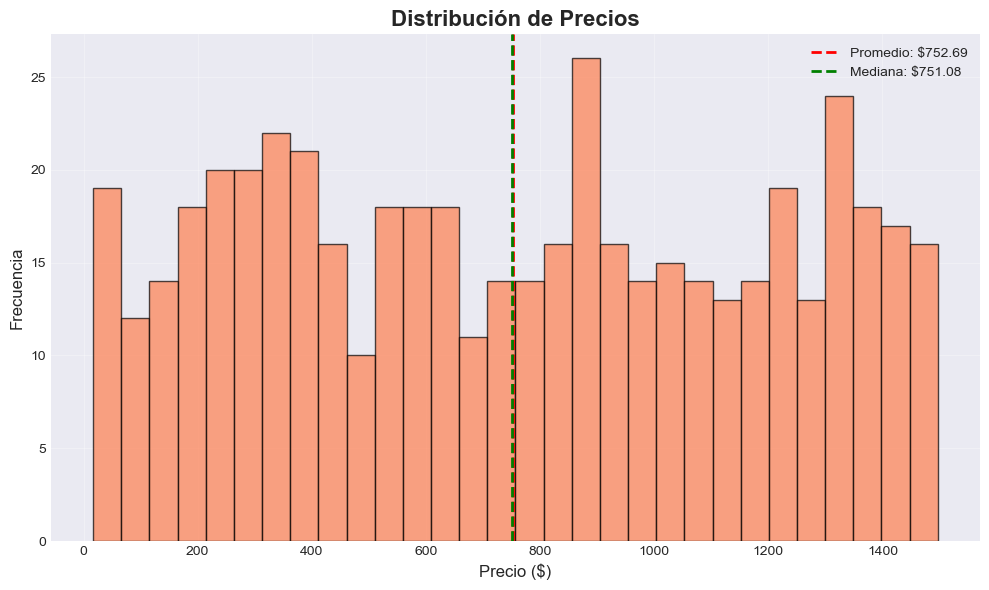

Histograma creado


In [18]:
# CELDA 15: HISTOGRAMA - DISTRIBUCIÓN DE PRECIOS

# Creamos un histograma para ver cómo se distribuyen los precios
plt.figure(figsize=(10, 6))
plt.hist(df['Precio'], bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribución de Precios', fontsize=16, fontweight='bold')
plt.xlabel('Precio ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(df['Precio'].mean(), color='red', linestyle='--', linewidth=2, label=f'Promedio: ${df["Precio"].mean():.2f}')
plt.axvline(df['Precio'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${df["Precio"].median():.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Histograma creado")

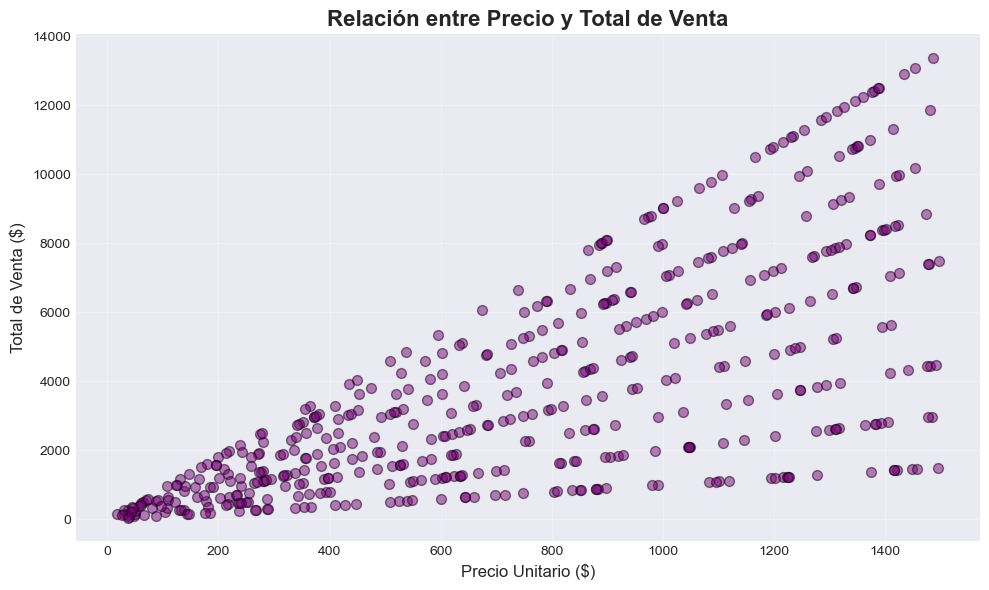

Gráfico de dispersión creado


In [19]:
# CELDA 16: SCATTER PLOT - PRECIO VS TOTAL

# Creamos un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Precio'], df['Total'], alpha=0.5, color='purple', edgecolor='black', s=50)
plt.title('Relación entre Precio y Total de Venta', fontsize=16, fontweight='bold')
plt.xlabel('Precio Unitario ($)', fontsize=12)
plt.ylabel('Total de Venta ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfico de dispersión creado")

In [20]:
# CELDA 17: Preparar datos temporales

# Extraemos el mes de cada fecha
df['Mes'] = df['Fecha'].dt.month
df['Nombre_Mes'] = df['Fecha'].dt.month_name()

print("Columnas de tiempo agregadas")
print("\nPrimeras filas con la nueva columna 'Mes':")
print(df[['Fecha', 'Mes', 'Nombre_Mes', 'Total']].head())

Columnas de tiempo agregadas

Primeras filas con la nueva columna 'Mes':
       Fecha  Mes Nombre_Mes    Total
0 2024-01-01    1    January  7959.51
1 2024-01-02    1    January  5603.50
2 2024-01-03    1    January  2612.68
3 2024-01-04    1    January  1200.54
4 2024-01-05    1    January  3029.81


In [21]:
# CELDA 18: Ventas totales por mes

# Calculamos las ventas totales por mes
ventas_por_mes = df.groupby('Mes')['Total'].sum()

print("Ventas totales por mes:")
for mes, total in ventas_por_mes.items():
    print(f" Mes {mes}: ${total:,.2f}")

# Estadísticas
print(f"\n Mes con más ventas: Mes {ventas_por_mes.idxmax()} (${ventas_por_mes.max():,.2f})")
print(f"Mes con menos ventas: Mes {ventas_por_mes.idxmin()} (${ventas_por_mes.min():,.2f})")

Ventas totales por mes:
 Mes 1: $229,403.79
 Mes 2: $185,761.48
 Mes 3: $272,621.09
 Mes 4: $242,315.38
 Mes 5: $186,098.09
 Mes 6: $129,488.50
 Mes 7: $91,351.87
 Mes 8: $107,417.06
 Mes 9: $106,760.80
 Mes 10: $116,602.47
 Mes 11: $85,248.72
 Mes 12: $133,800.17

 Mes con más ventas: Mes 3 ($272,621.09)
Mes con menos ventas: Mes 11 ($85,248.72)


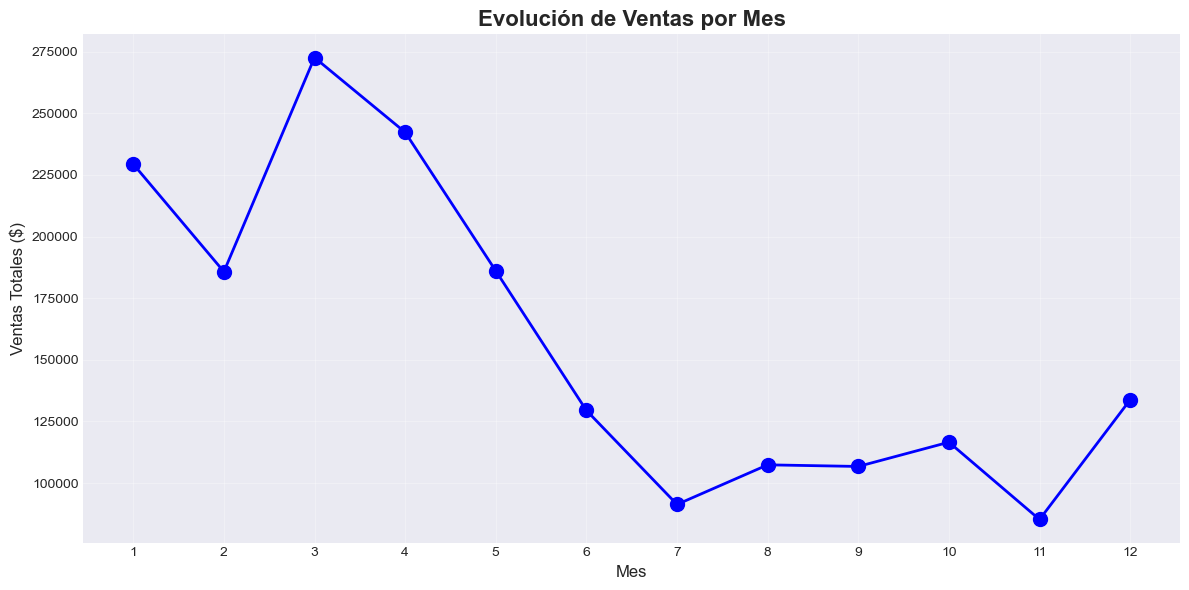

Gráfica de evolución creada


In [22]:
# CELDA 19: GRÁFICA - EVOLUCIÓN DE VENTAS

# Creamos una gráfica de línea para ver la evolución
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_mes.index, ventas_por_mes.values, marker='o', linewidth=2, markersize=10, color='blue')
plt.title('Evolución de Ventas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(ventas_por_mes.index)
plt.tight_layout()
plt.show()

print("Gráfica de evolución creada")

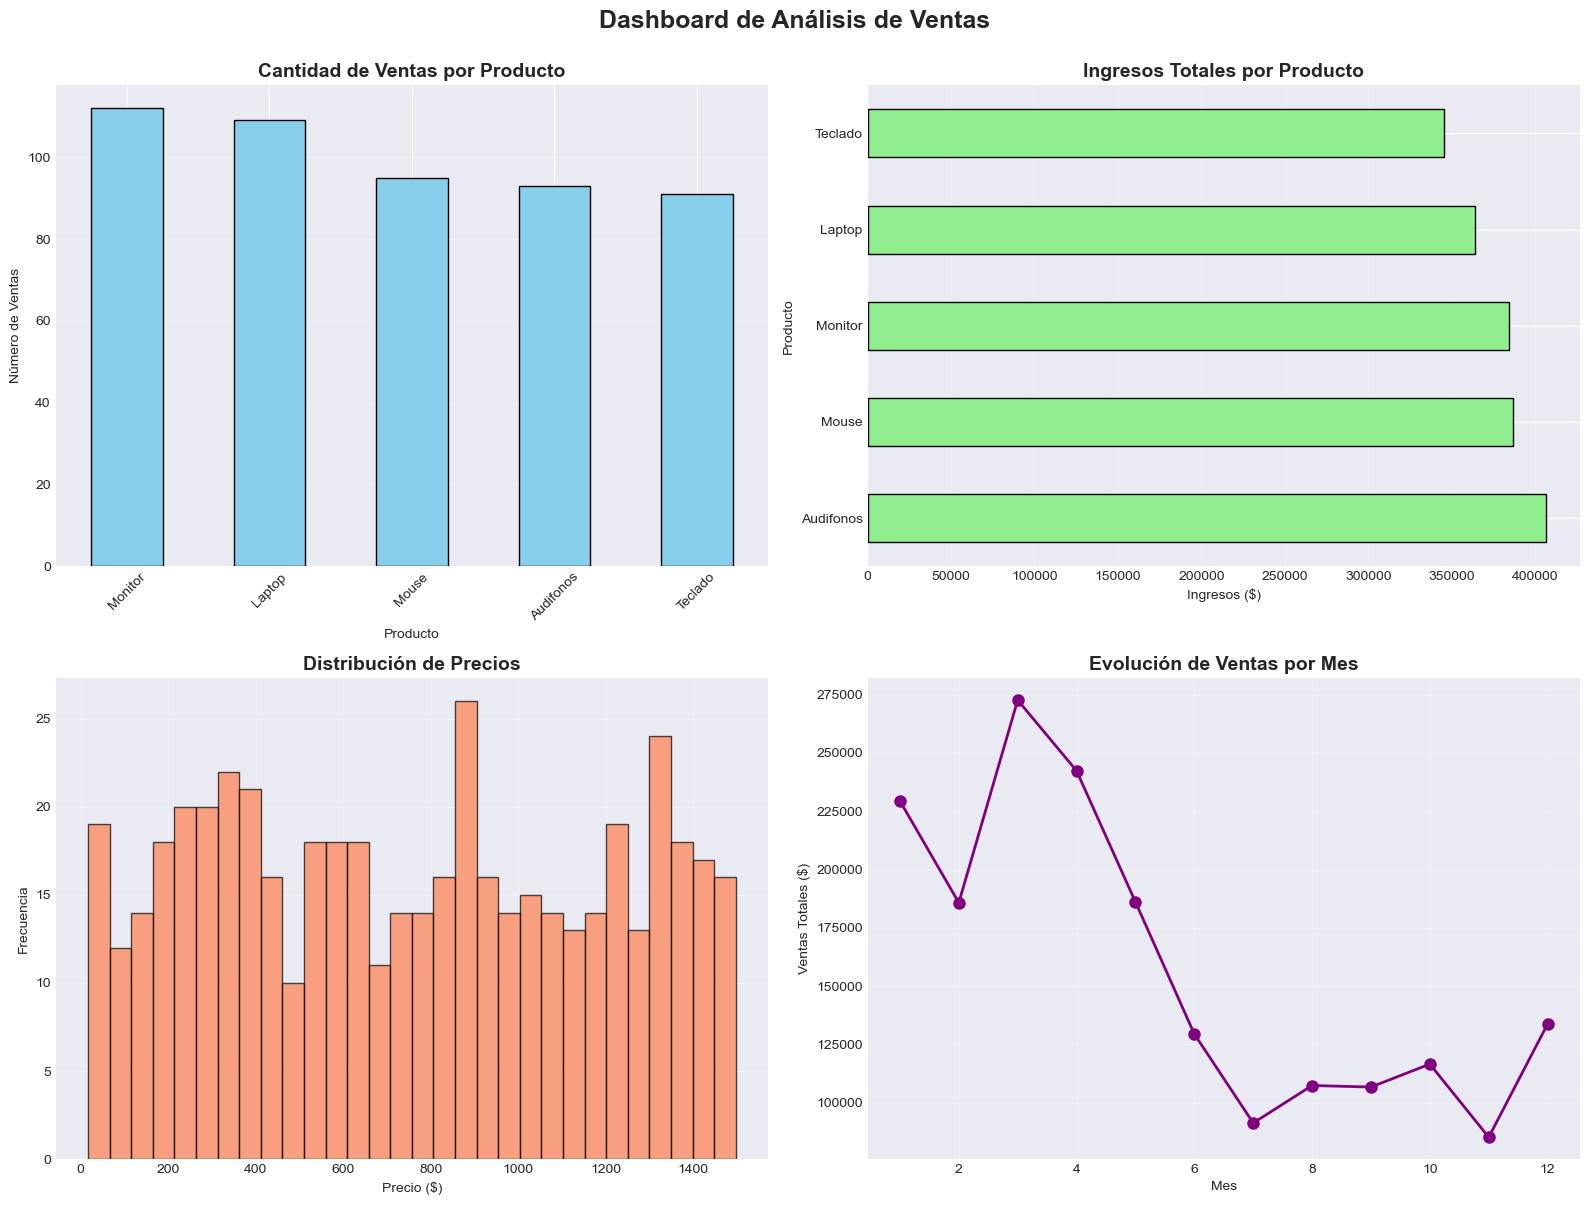

Dashboard completo creado


In [23]:
# CELDA 20: DASHBOARD COMPLETO

# Creamos una figura con 4 gráficas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dashboard de Análisis de Ventas', fontsize=18, fontweight='bold', y=1.00)

# Gráfica 1: Cantidad de ventas por producto
ventas_por_producto.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Cantidad de Ventas por Producto', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Producto')
axes[0, 0].set_ylabel('Número de Ventas')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfica 2: Ingresos por producto
ingresos_por_producto.plot(kind='barh', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Ingresos Totales por Producto', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ingresos ($)')
axes[0, 1].set_ylabel('Producto')
axes[0, 1].grid(axis='x', alpha=0.3)

# Gráfica 3: Distribución de precios
axes[1, 0].hist(df['Precio'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribución de Precios', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Precio ($)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(alpha=0.3)

# Gráfica 4: Evolución temporal
axes[1, 1].plot(ventas_por_mes.index, ventas_por_mes.values, marker='o', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_title('Evolución de Ventas por Mes', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Ventas Totales ($)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Dashboard completo creado")

In [25]:
# CELDA 21: ESTADÍSTICAS GENERALES

total_ingresos = df['Total'].sum()
precio_promedio_general = df['Precio'].mean()
cantidad_promedio = df['Cantidad'].mean()
venta_maxima = df['Total'].max()
venta_minima = df['Total'].min()

print("RESUMEN GENERAL DEL ANÁLISIS")

print(f"\nIngresos totales: ${total_ingresos:,.2f}")
print(f"Precio promedio: ${precio_promedio_general:.2f}")
print(f"Cantidad promedio por venta: {cantidad_promedio:.2f}")
print(f"Venta más alta: ${venta_maxima:,.2f}")
print(f"Venta más baja: ${venta_minima:.2f}")
print(f"Total de transacciones: {len(df)}")

RESUMEN GENERAL DEL ANÁLISIS

Ingresos totales: $1,886,869.42
Precio promedio: $752.69
Cantidad promedio por venta: 4.94
Venta más alta: $13,381.56
Venta más baja: $36.63
Total de transacciones: 500


Matriz de Correlación:
           Precio  Cantidad     Total
Precio    1.00000  0.048000  0.706190
Cantidad  0.04800  1.000000  0.647053
Total     0.70619  0.647053  1.000000


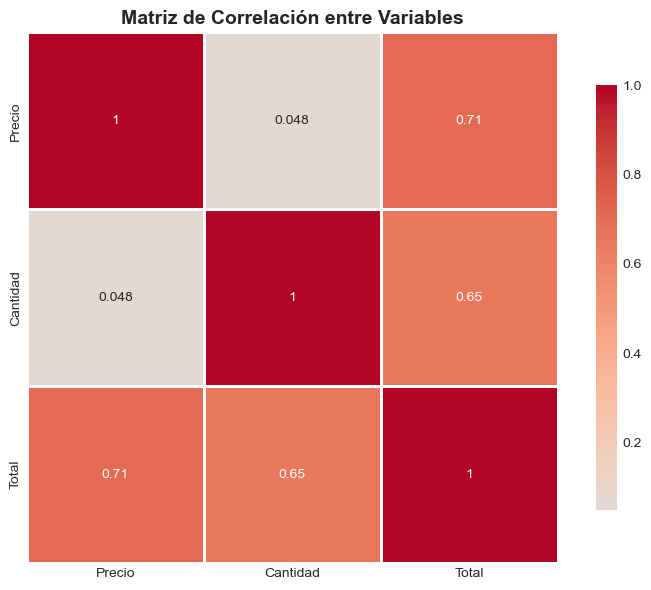


Matriz de correlación creada


In [26]:
# CELDA 23: MATRIZ DE CORRELACIÓN

# Seleccionamos solo las columnas numéricas
columnas_numericas = ['Precio', 'Cantidad', 'Total']
correlacion = df[columnas_numericas].corr()

print("Matriz de Correlación:")
print(correlacion)

# Visualizamos la correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nMatriz de correlación creada")

In [27]:
# CELDA 24: GUARDAR DATOS PROCESADOS

# Guardamos el DataFrame en un archivo CSV
df.to_csv('Proyecto_1.csv', index=False, encoding='utf-8')

print("Dataset guardado exitosamente como 'Proyecto_1.csv'")

Dataset guardado exitosamente como 'Proyecto_1.csv'
